In [14]:
import gymnasium as gym
from stable_baselines3.common.env_checker import check_env
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line
from envs.one_fish import one_fish
from envs.three_fish import three_fish
from envs.rescale_env import rescale_env

# RL envs work in transformed units
# rescale_wrapper lets us humans play in natural units
rl_env = three_fish()
env = rescale_env(rl_env)

env.reset()
env.step(1)

(array([0.        , 0.07754475, 0.33308458], dtype=float32),
 -49.16879422403872,
 True,
 False,
 {})

In [20]:

df = []
episode_reward = 0
observation, _ = env.reset()
for t in range(10):
    status = ("t: " + str(t) +
              ", Stock: " + format(observation[0],  '.3f') +
              ", profits: " + format(episode_reward, '.2f'))
    txt = input(status + ". Set harvest effort [0,1]:  ")
    action = np.float32(txt)
    df.append(np.append([t, action, episode_reward], observation))
    observation, reward, terminated, done, info = env.step(action)
    episode_reward += reward
    if terminated:
        break

episode_reward



1.4975854085588578

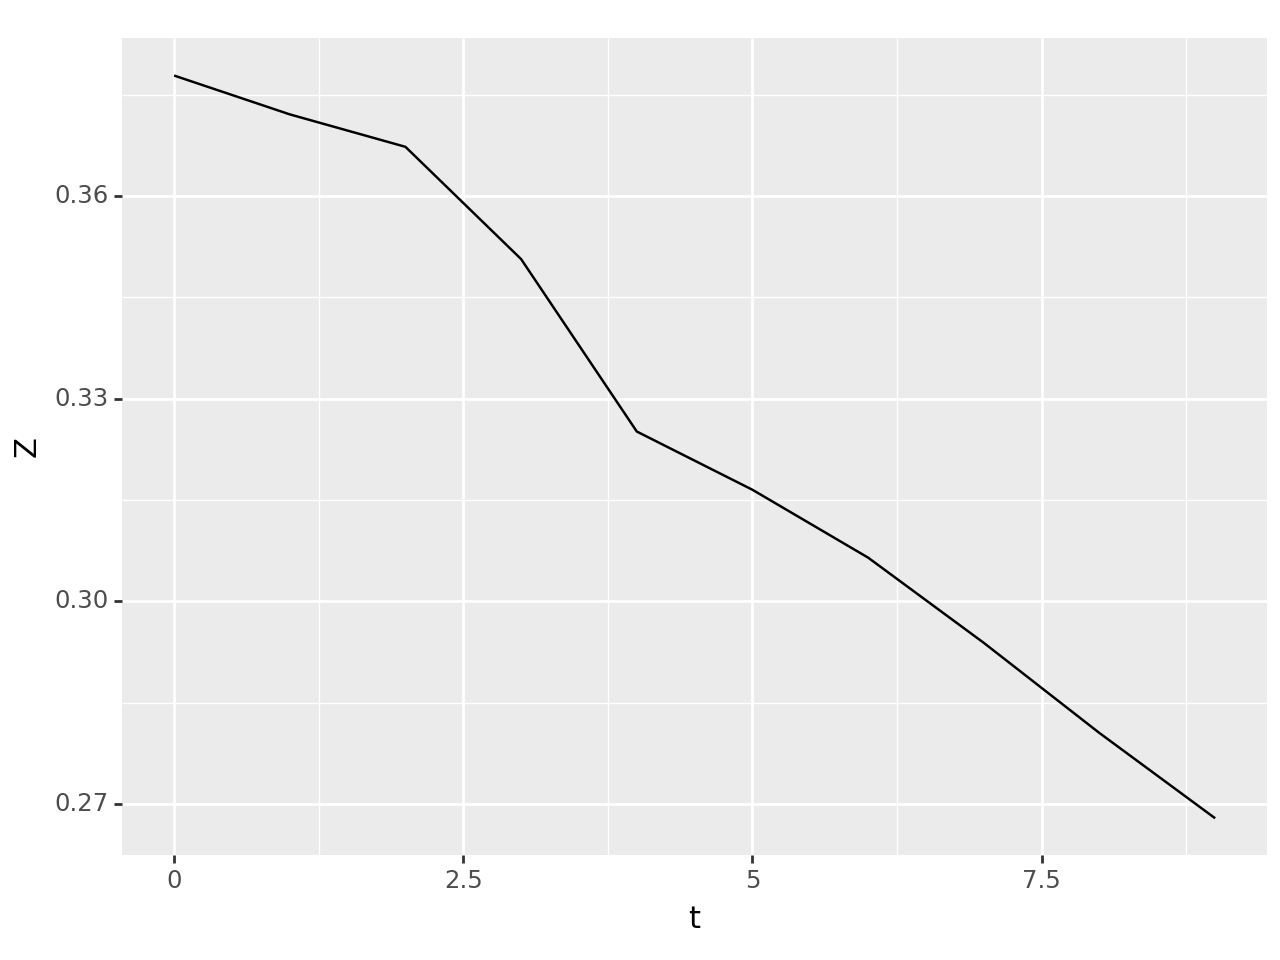

<Figure Size: (640 x 480)>

In [25]:

cols = ["t", "action", "reward", "X", "Y", "Z"]
df = pd.DataFrame(df, columns=cols)

ggplot(df, aes("t", "Z")) + geom_line()


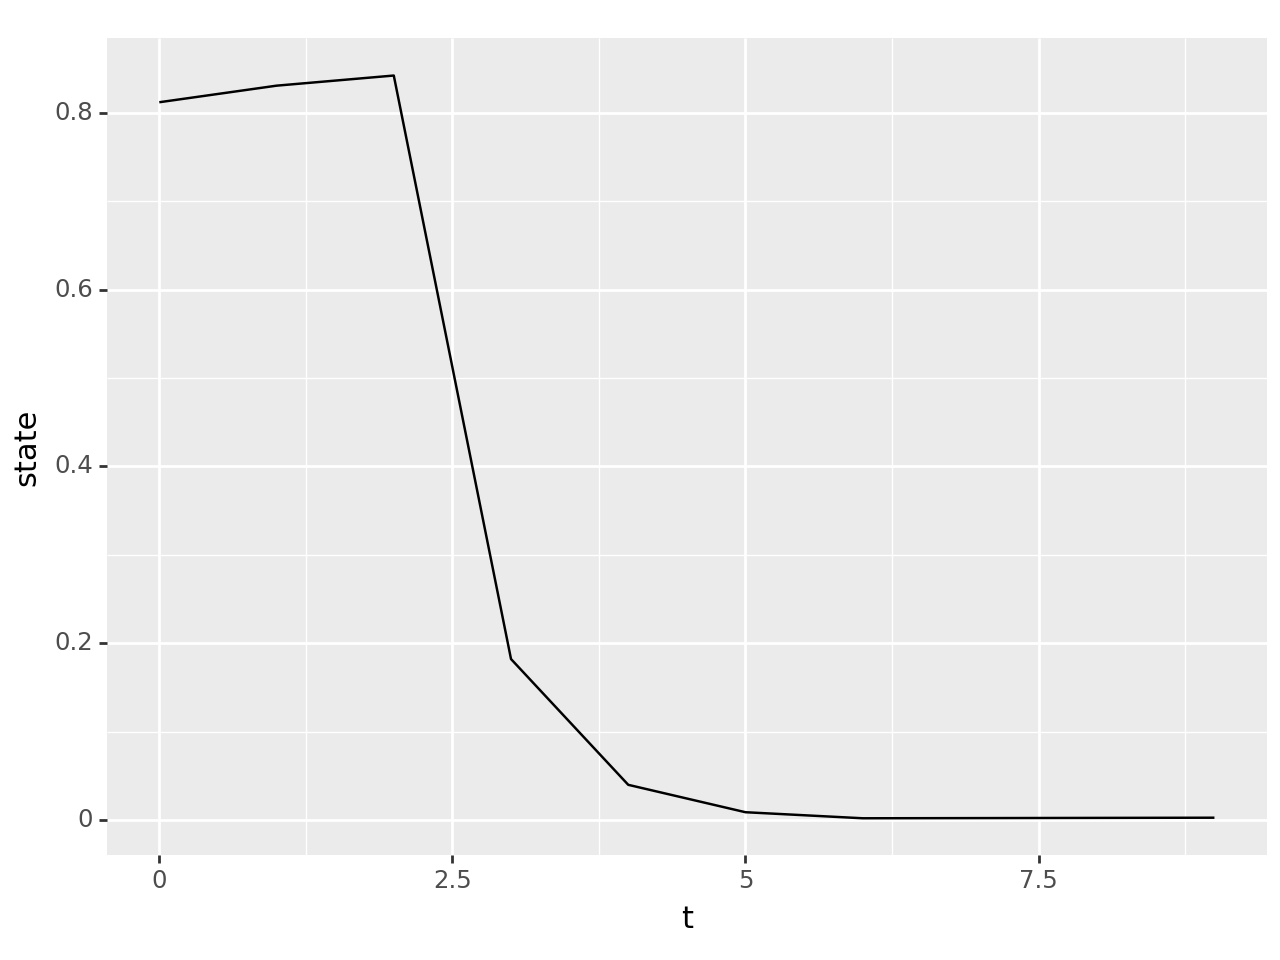

<Figure Size: (640 x 480)>

In [4]:
ggplot(df, aes("t", "action")) + geom_line()


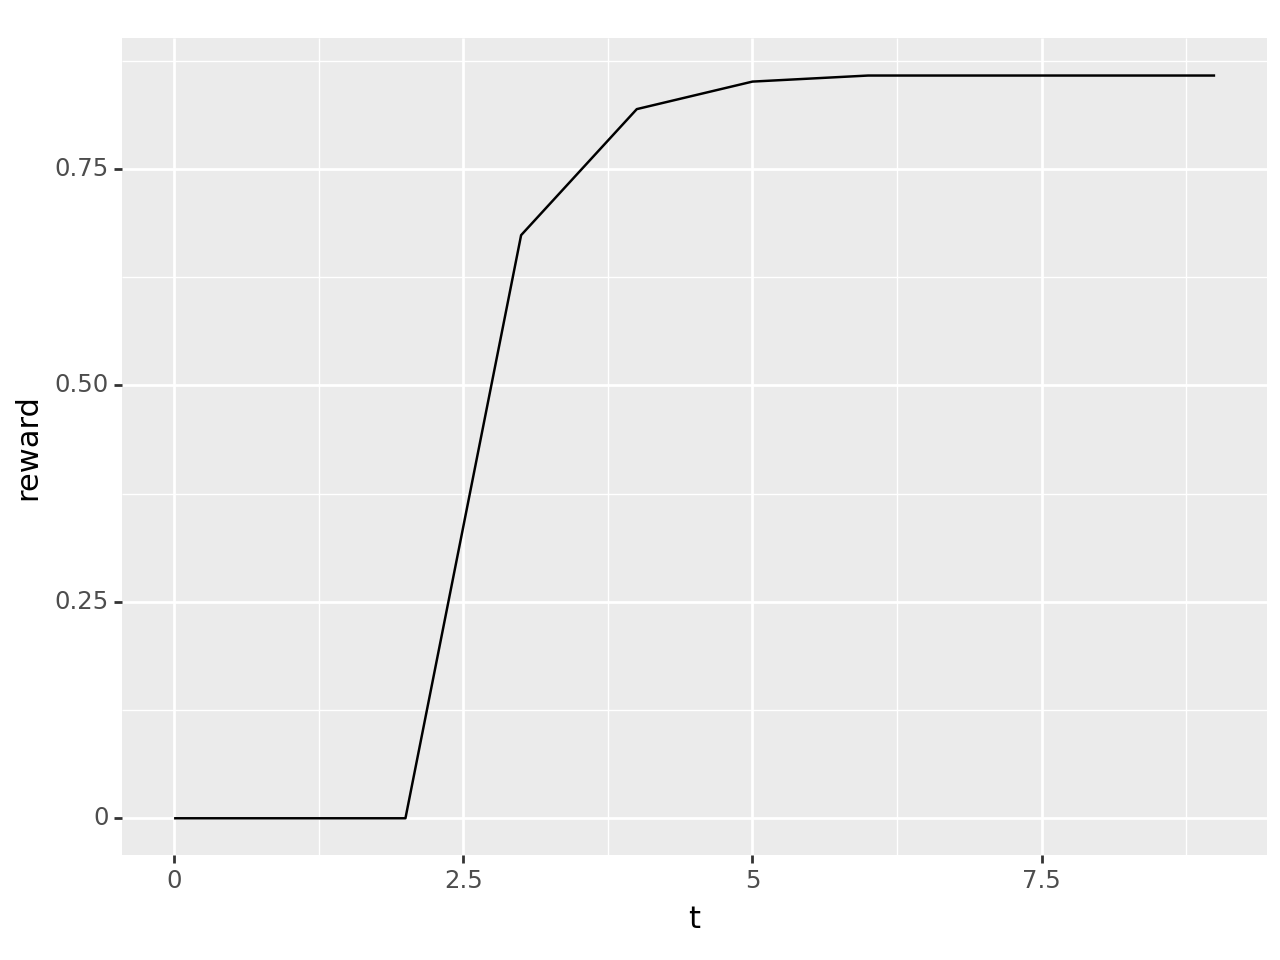

<Figure Size: (640 x 480)>

In [5]:
ggplot(df, aes("t", "reward")) + geom_line()

